In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data in Python

In [200]:
hep = pd.read_csv("hepatitis_csv.csv")
dia = pd.read_csv("diabetes_csv.csv")

In [201]:
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [202]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [203]:
print(dia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [204]:
mapping = {'male': 1, 'female': 0}
mapp = {'live':1, 'die':0}
hep['sex_int'] = hep['sex'].map(mapping)
hep['class_label'] = hep['class'].map(mapp)
print("DataFrame with Mapped Categories:")
print(hep)


DataFrame with Mapped Categories:
     age     sex steroid  antivirals fatigue malaise anorexia liver_big  \
0     30    male   False       False   False   False    False     False   
1     50  female   False       False    True   False    False     False   
2     78  female    True       False    True   False    False      True   
3     31  female     NaN        True   False   False    False      True   
4     34  female    True       False   False   False    False      True   
..   ...     ...     ...         ...     ...     ...      ...       ...   
150   46  female    True       False    True    True     True      True   
151   44  female    True       False    True   False    False      True   
152   61  female   False       False    True    True    False     False   
153   53    male   False       False    True   False    False      True   
154   43  female    True       False    True   False    False      True   

    liver_firm spleen_palpable  ... varices bilirubin alk_phospha

In [205]:
hep.replace({True: 1, False: 0}, inplace=True)

print("DataFrame after replacing True and False:")
print(hep)

DataFrame after replacing True and False:
     age     sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0     30    male      0.0           0      0.0      0.0       0.0        0.0   
1     50  female      0.0           0      1.0      0.0       0.0        0.0   
2     78  female      1.0           0      1.0      0.0       0.0        1.0   
3     31  female      NaN           1      0.0      0.0       0.0        1.0   
4     34  female      1.0           0      0.0      0.0       0.0        1.0   
..   ...     ...      ...         ...      ...      ...       ...        ...   
150   46  female      1.0           0      1.0      1.0       1.0        1.0   
151   44  female      1.0           0      1.0      0.0       0.0        1.0   
152   61  female      0.0           0      1.0      1.0       0.0        0.0   
153   53    male      0.0           0      1.0      0.0       0.0        1.0   
154   43  female      1.0           0      1.0      0.0       0.0        1.0  

In [206]:
hep = hep.drop(columns = ['class','sex'])

## Drop columns that aren’t useful.

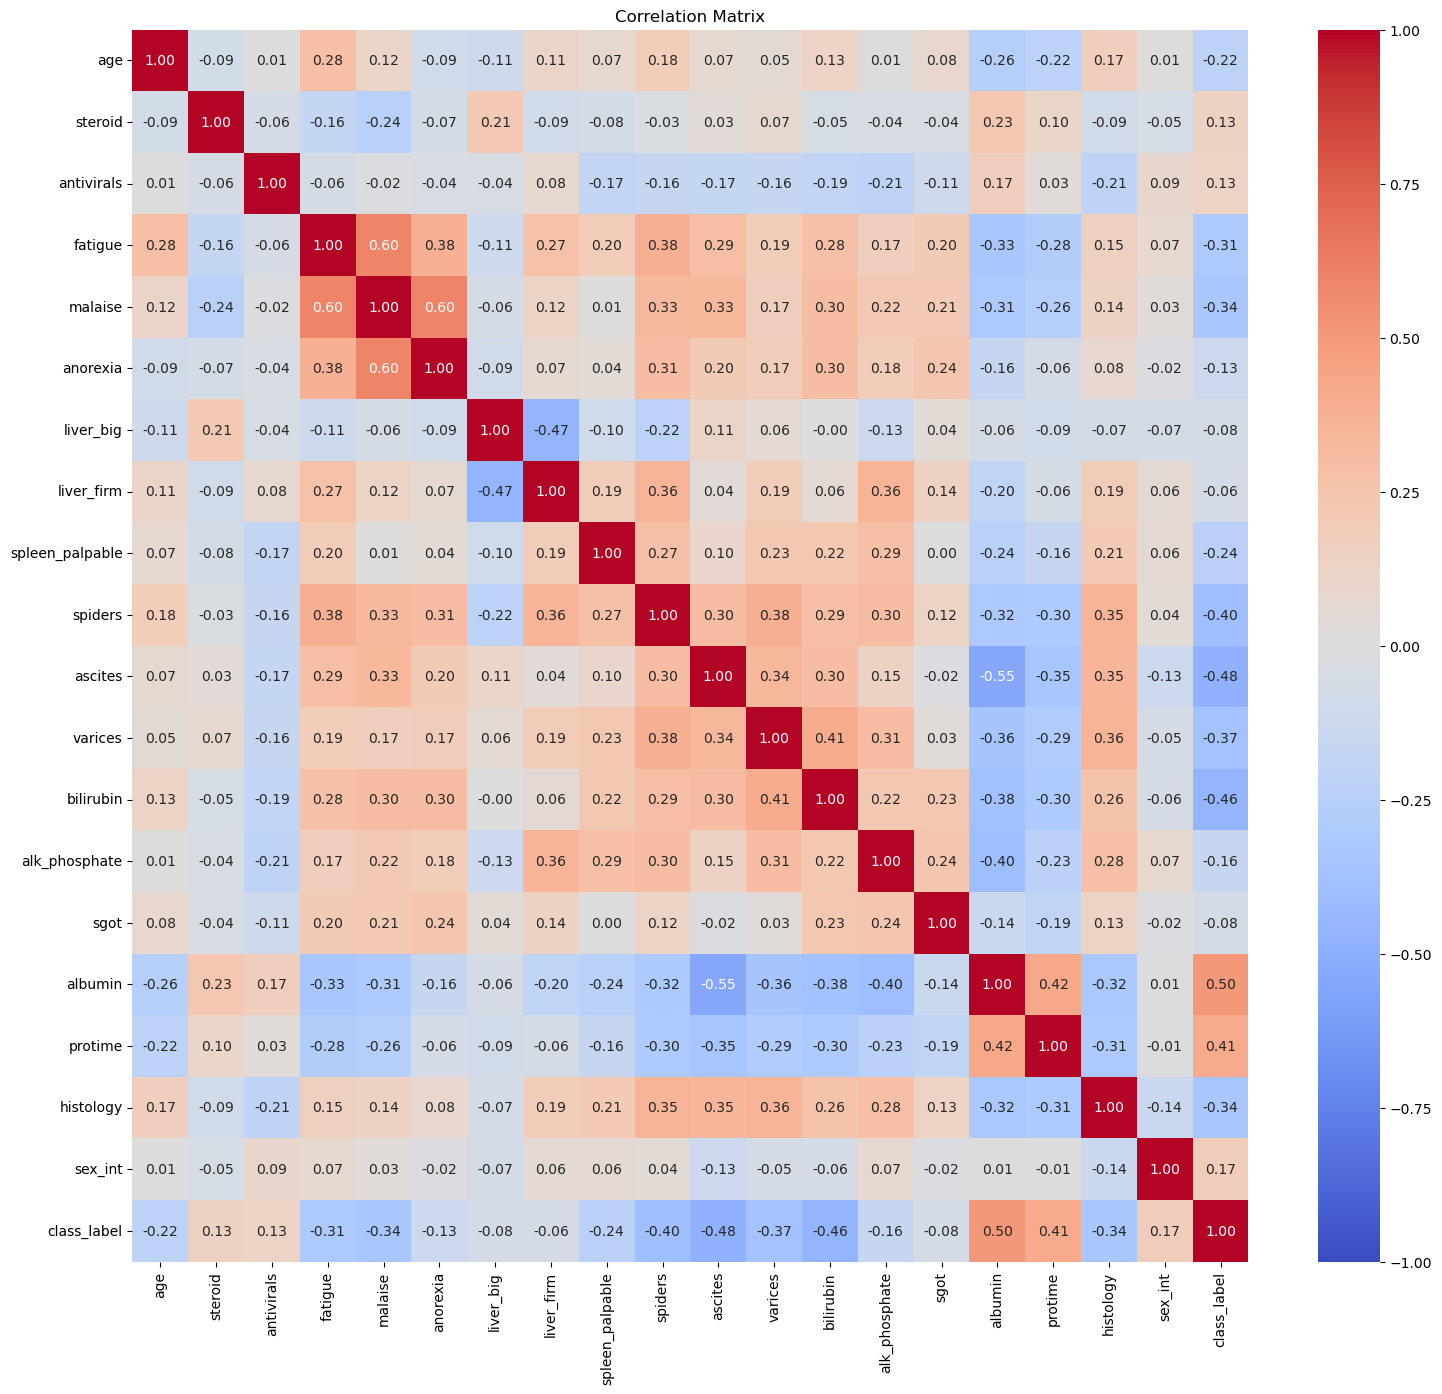

In [207]:
correlation_matrix = hep.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [208]:
hep = hep.drop(columns = ['sgot','liver_firm','liver_big'])

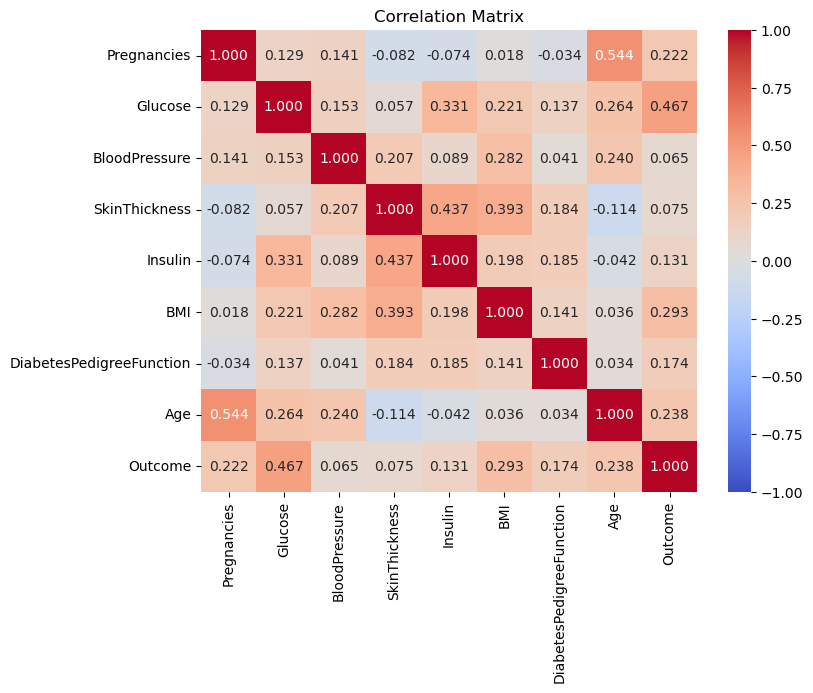

In [209]:
correlation_matrix = dia.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [210]:
dia = dia.drop(columns = ['BloodPressure','SkinThickness'])

In [211]:
dia.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [212]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [213]:
hep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   steroid          154 non-null    float64
 2   antivirals       155 non-null    int64  
 3   fatigue          154 non-null    float64
 4   malaise          154 non-null    float64
 5   anorexia         154 non-null    float64
 6   spleen_palpable  150 non-null    float64
 7   spiders          150 non-null    float64
 8   ascites          150 non-null    float64
 9   varices          150 non-null    float64
 10  bilirubin        149 non-null    float64
 11  alk_phosphate    126 non-null    float64
 12  albumin          139 non-null    float64
 13  protime          88 non-null     float64
 14  histology        155 non-null    int64  
 15  sex_int          155 non-null    int64  
 16  class_label      155 non-null    int64  
dtypes: float64(12), 

## Take care of Missing Data

In [214]:
hep.describe()

,age,steroid,antivirals,fatigue,malaise,anorexia,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,albumin,protime,histology,sex_int,class_label
count,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,139.000000,88.000000,155.000000,155.000000,155.000000
mean,41.200000,0.506494,0.154839,0.649351,0.396104,0.207792,0.20000,0.340000,0.133333,0.12000,1.427517,105.325397,3.817266,61.852273,0.451613,0.103226,0.793548
std,12.565878,0.501589,0.362923,0.478730,0.490682,0.407051,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,0.651523,22.875244,0.499266,0.305240,0.406070
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.300000,26.000000,2.100000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.700000,74.250000,3.400000,46.000000,0.000000,0.000000,1.000000
50%,39.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,85.000000,4.000000,61.000000,0.000000,0.000000,1.000000
75%,50.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.00000,1.500000,132.250000,4.200000,76.250000,1.000000,0.000000,1.000000
max,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.000000,295.000000,6.400000,100.000000,1.000000,1.000000,1.000000


In [215]:
hep['protime'].fillna(value=hep['protime'].mean(), inplace=True) 
hep['albumin'].fillna(value=hep['albumin'].median(), inplace=True) 

In [216]:
hep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   steroid          154 non-null    float64
 2   antivirals       155 non-null    int64  
 3   fatigue          154 non-null    float64
 4   malaise          154 non-null    float64
 5   anorexia         154 non-null    float64
 6   spleen_palpable  150 non-null    float64
 7   spiders          150 non-null    float64
 8   ascites          150 non-null    float64
 9   varices          150 non-null    float64
 10  bilirubin        149 non-null    float64
 11  alk_phosphate    126 non-null    float64
 12  albumin          155 non-null    float64
 13  protime          155 non-null    float64
 14  histology        155 non-null    int64  
 15  sex_int          155 non-null    int64  
 16  class_label      155 non-null    int64  
dtypes: float64(12), 

## Drop rows with missing values.

In [217]:
hep = hep.dropna()

In [218]:
hep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 154
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              121 non-null    int64  
 1   steroid          121 non-null    float64
 2   antivirals       121 non-null    int64  
 3   fatigue          121 non-null    float64
 4   malaise          121 non-null    float64
 5   anorexia         121 non-null    float64
 6   spleen_palpable  121 non-null    float64
 7   spiders          121 non-null    float64
 8   ascites          121 non-null    float64
 9   varices          121 non-null    float64
 10  bilirubin        121 non-null    float64
 11  alk_phosphate    121 non-null    float64
 12  albumin          121 non-null    float64
 13  protime          121 non-null    float64
 14  histology        121 non-null    int64  
 15  sex_int          121 non-null    int64  
 16  class_label      121 non-null    int64  
dtypes: float64(12), int64

## Convert the data frame to NumPy.

In [219]:
hep_np = hep.to_numpy()
dia_np = dia.to_numpy()

In [220]:
hep_np

array([[30.,  0.,  0., ...,  0.,  1.,  1.],
       [50.,  0.,  0., ...,  0.,  0.,  1.],
       [78.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [61.,  0.,  0., ...,  1.,  0.,  1.],
       [53.,  0.,  0., ...,  1.,  1.,  1.],
       [43.,  1.,  0., ...,  1.,  0.,  0.]])

In [221]:
dia_np

array([[  6.   , 148.   ,   0.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,   0.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,   0.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   , 112.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,   0.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,   0.   , ...,   0.315,  23.   ,   0.   ]])

## Divide the data set into training data and test data.

In [222]:
np.random.seed(42)
np.random.shuffle(hep_np)

test_size = 0.2
split_index = int(len(hep_np) * (1 - test_size))

train_data = hep_np[:split_index]
test_data = hep_np[split_index:]

X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

In [223]:
np.random.seed(42)
np.random.shuffle(dia_np)

test_size = 0.2
split_index = int(len(dia_np) * (1 - test_size))

train_data = dia_np[:split_index]
test_data = dia_np[split_index:]

X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Q2


Intercept (B0): 2.0666666666666687
Slope (B1): 0.8424242424242425
RMSE: 0.7450849046595397


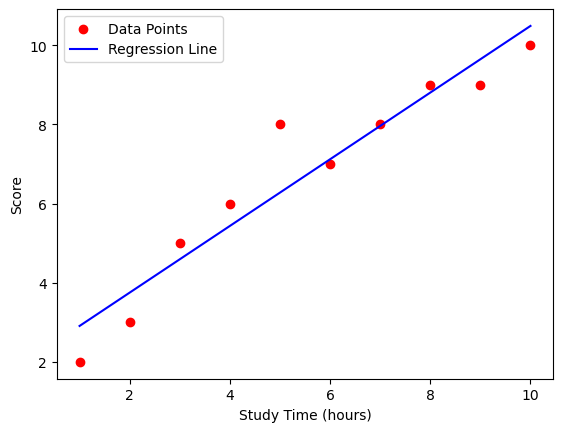

In [224]:
data = pd.read_csv('study_scores.csv')
x = data['study_time'].values
y = data['score'].values

X = np.vstack([np.ones_like(x), x]).T

B = np.linalg.inv(X.T @ X) @ X.T @ y
B0, B1 = B

y_pred = X @ B
#Pedhazur Method
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

print(f'Intercept (B0): {B0}')
print(f'Slope (B1): {B1}')
print(f'RMSE: {rmse}')

plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y_pred, color='blue', label='Regression Line')
plt.xlabel('Study Time (hours)')
plt.ylabel('Score')
plt.legend()
plt.show()

In [225]:
def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    B0, B1 = 0, 0  
    for _ in range(epochs):
        #Calculus Method
        y_pred = B0 + B1 * x
        error = y - y_pred
        B0 -= learning_rate * (-2/m) * np.sum(error)
        B1 -= learning_rate * (-2/m) * np.sum(error * x)
    return B0, B1

B0_gd, B1_gd = gradient_descent(x, y)

print(f'Gradient Descent Intercept (B0): {B0_gd}')
print(f'Gradient Descent Slope (B1): {B1_gd}')


Gradient Descent Intercept (B0): 2.038318797923244
Gradient Descent Slope (B1): 0.8464961459059409


In [226]:
study_time = 10
predicted_score = B0 + B1 * study_time
print(f'Predicted score for {study_time} hours of study: {predicted_score}')


Predicted score for 10 hours of study: 10.490909090909094


# Additional

In [294]:
data = hep
x = pd.to_numeric(data['albumin'], errors='coerce').values
y = pd.to_numeric(data['class_label'], errors='coerce').values

Iteration 0: Cost 0.4049586776859504
Iteration 100: Cost 0.39246818563717945
Iteration 200: Cost 0.39079471357366913
Iteration 300: Cost 0.39057050233071616
Iteration 400: Cost 0.39054046258128583
Iteration 500: Cost 0.3905364378654243
Iteration 600: Cost 0.3905358986353018
Iteration 700: Cost 0.39053582638942536
Iteration 800: Cost 0.3905358167099463
Iteration 900: Cost 0.39053581541309285


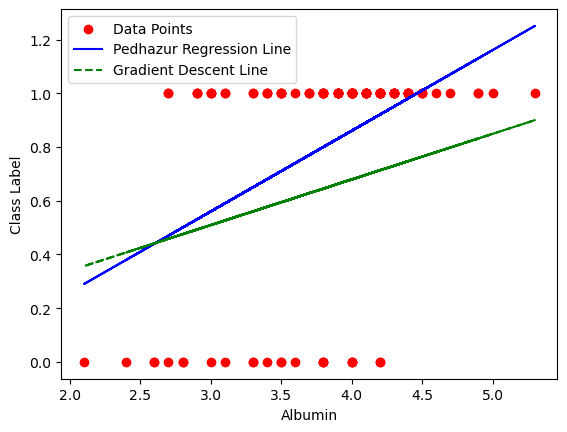

Pedhazur Formula - Intercept (B0): -0.34070359914409715, Slope (B1): 0.3003130618991277
Gradient Descent - Intercept (B0): 0.0, Slope (B1): 0.16983296025473135
Predicted y using Pedhazur Formula: 2.66242701984718
Predicted y using Gradient Descent: 1.6983296025473136


In [296]:
nan_indices = np.isnan(x) | np.isnan(y)
x = x[~nan_indices]
y = y[~nan_indices]

X = np.vstack([np.ones_like(x), x]).T

# Standardize features
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  
    return (X - mean) / std

X_scaled = standardize(X)

def pedhazur_formula(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

B_pedhazur = pedhazur_formula(X, y)
B0_pedhazur, B1_pedhazur = B_pedhazur
y_pred_pedhazur = X @ B_pedhazur
rmse_pedhazur = np.sqrt(np.mean((y - y_pred_pedhazur) ** 2))

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    B = np.zeros(X.shape[1])
    m = len(y)
    
    for i in range(num_iterations):
        predictions = X @ B
        errors = predictions - y
        gradient = (1 / m) * X.T @ errors
        B -= learning_rate * gradient
        
        cost = np.mean(errors ** 2) / 2
        if np.isnan(cost) or np.isinf(cost):
            print(f'Cost is NaN or Inf at iteration {i}')
            break

        if i % 100 == 0:
            print(f'Iteration {i}: Cost {cost}')

    return B

B_gradient_descent = gradient_descent(X_scaled, y)
B0_gradient_descent, B1_gradient_descent = B_gradient_descent
y_pred_gradient_descent = X @ B_gradient_descent
rmse_gradient_descent = np.sqrt(np.mean((y - y_pred_gradient_descent) ** 2))

plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y_pred_pedhazur, color='blue', label='Pedhazur Regression Line')
plt.plot(x, y_pred_gradient_descent, color='green', linestyle='--', label='Gradient Descent Line')
plt.xlabel('Albumin')
plt.ylabel('Class Label')
plt.legend()
plt.show()

print(f'Pedhazur Formula - Intercept (B0): {B0_pedhazur}, Slope (B1): {B1_pedhazur}')
print(f'Gradient Descent - Intercept (B0): {B0_gradient_descent}, Slope (B1): {B1_gradient_descent}')

example_x = 10  
example_X = np.array([1, example_x])
predicted_y_pedhazur = example_X @ B_pedhazur
predicted_y_gradient_descent = example_X @ B_gradient_descent

print(f'Predicted y using Pedhazur Formula: {predicted_y_pedhazur}')
print(f'Predicted y using Gradient Descent: {predicted_y_gradient_descent}')
